# Symmetric Planar Waveguides

**Scott Prahl**

**Sept 2023**

Planar waveguides are a strange abstraction.  These are waveguides that are sandwiches with a specified thickness but are infinite in extent in the other directions.  Studying planar waveguides before cylindrical waveguides is done because the math is simpler (solutions are trignometric functions instead of Bessel functions) and therefore it is a bit less likely that one will get lost in the math.

In [1]:
# Jupyterlite support for ofiber
try:
    import micropip
    await micropip.install("ofiber")
except ModuleNotFoundError:
    pass

import matplotlib.pyplot as plt
import numpy as np
import ofiber
    
# to make graphs a bit better
%config InlineBackend.figure_format='retina'

## Modes in planar waveguides

### V=3.15

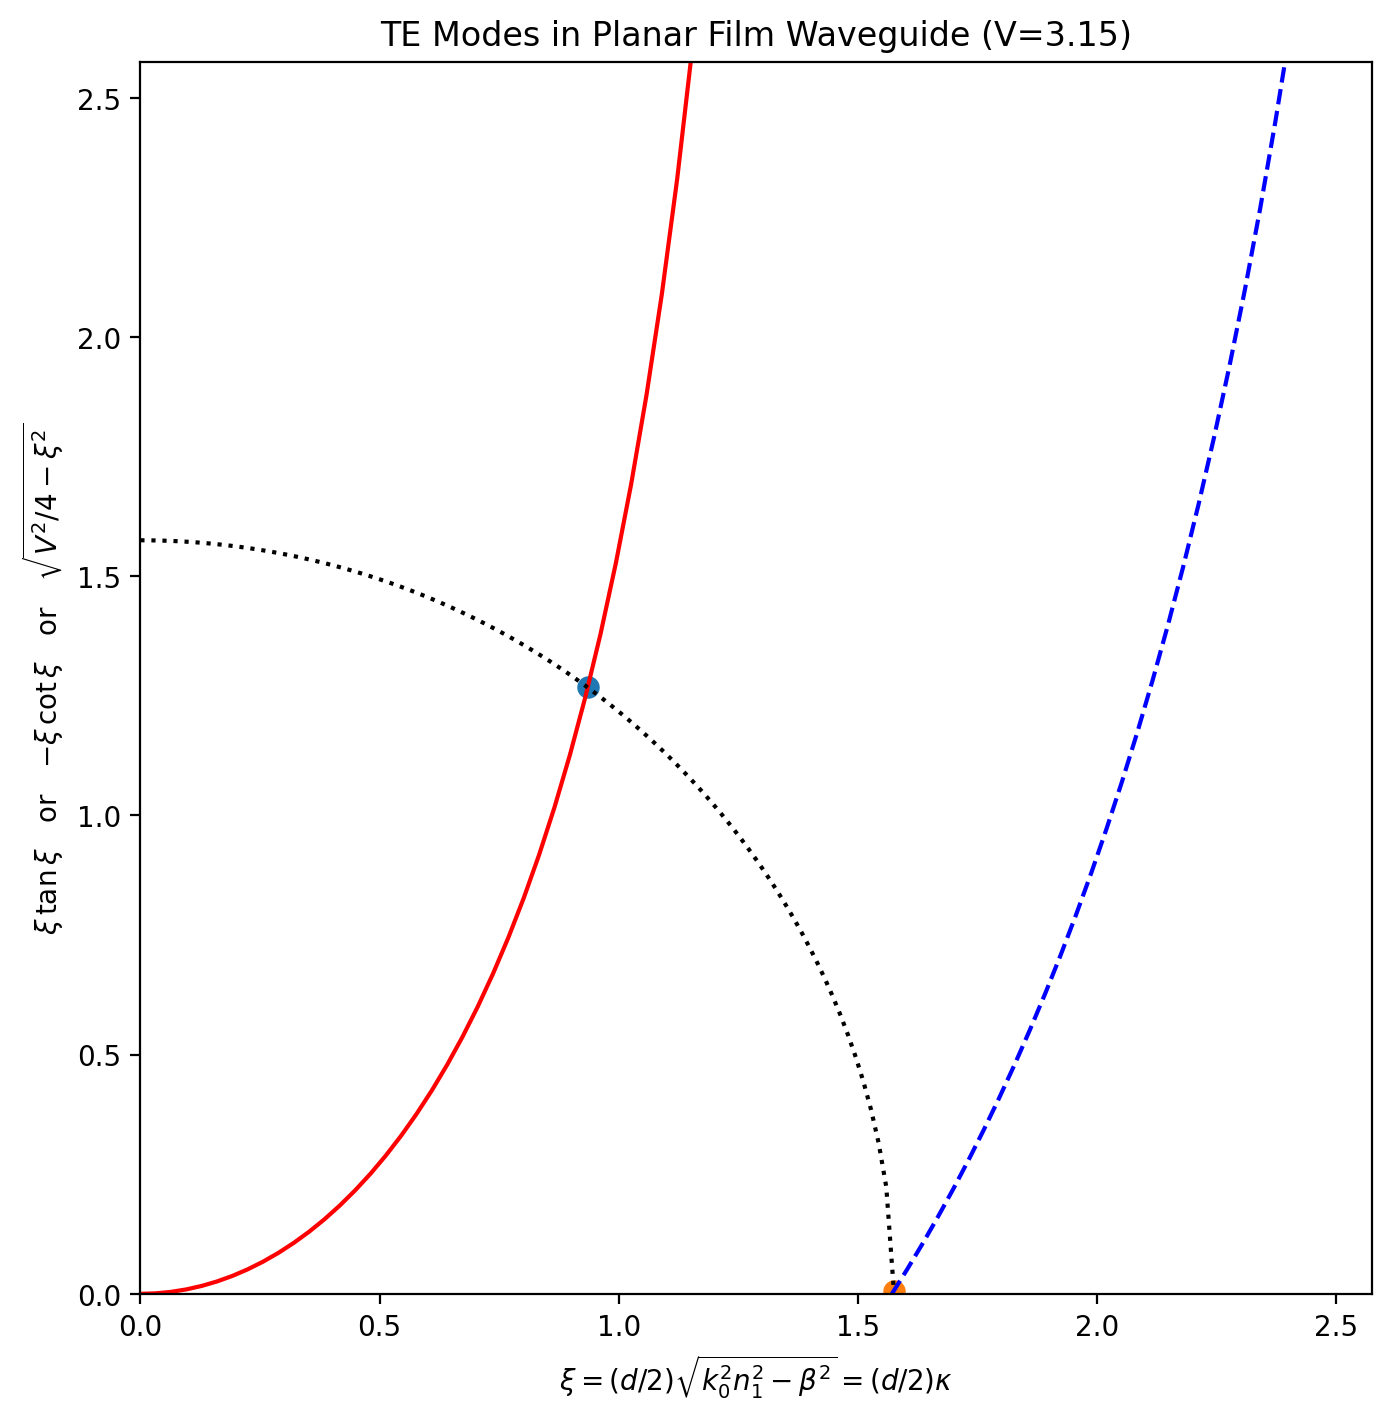

In [2]:
V=3.15
xx = ofiber.TE_crossings(V)
aplt = ofiber.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

### V=4.77

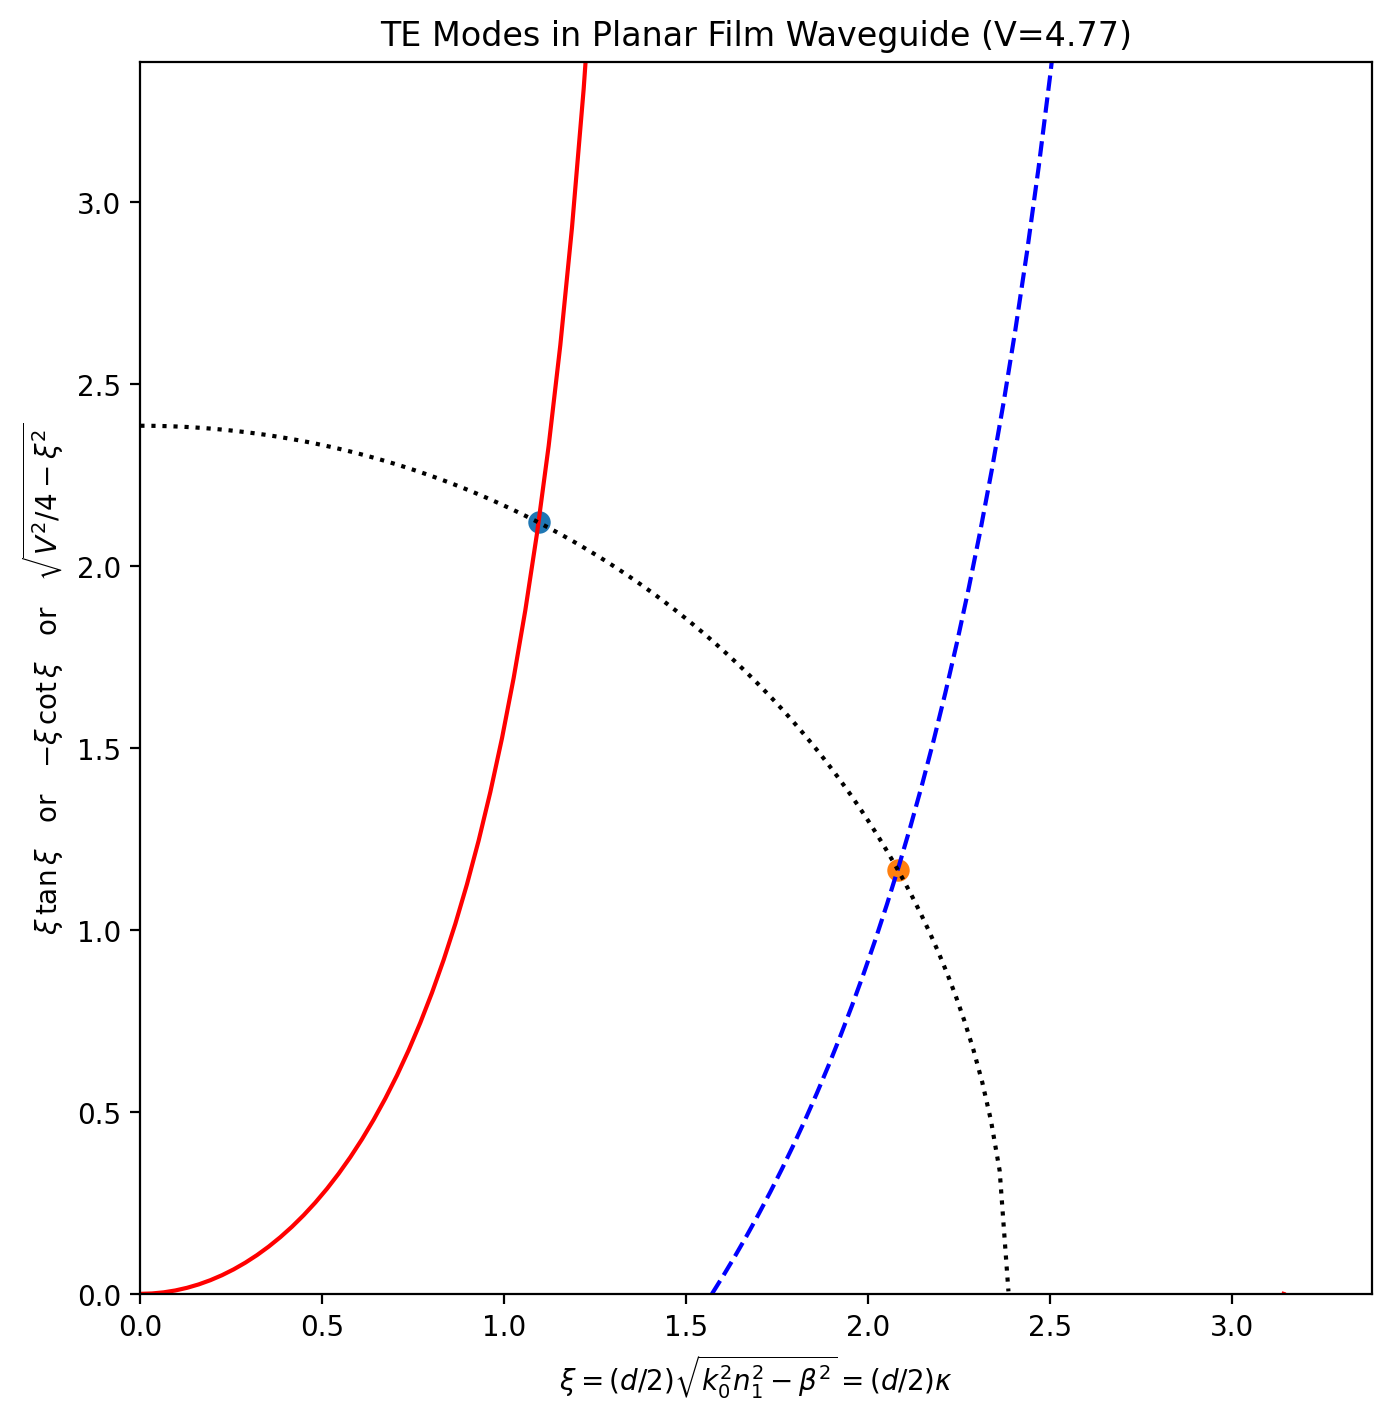

[1.09425217 2.08131807]
b       = [0.78958411 0.23876175]
beta hat= [1.50236925 1.50071683]
theta   = [1.6599766  3.15850983]  degrees


In [3]:
n1=1.503
n2=1.5
lambda0 = 0.5e-6
k=2*np.pi/lambda0
NA = np.sqrt(n1**2-n2**2)
d = 4e-6

V = k * d * NA
xx = ofiber.TE_crossings(V)

b = 1-(2*xx/V)**2
beta = np.sqrt((n1**2-n2**2)*b+n2**2)
theta = np.arccos(beta/n1)*180/np.pi

aplt = ofiber.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)
aplt.show()

print(xx)
print('b       =',b)
print('beta hat=',beta)
print('theta   =',theta,' degrees')


### V=5.5

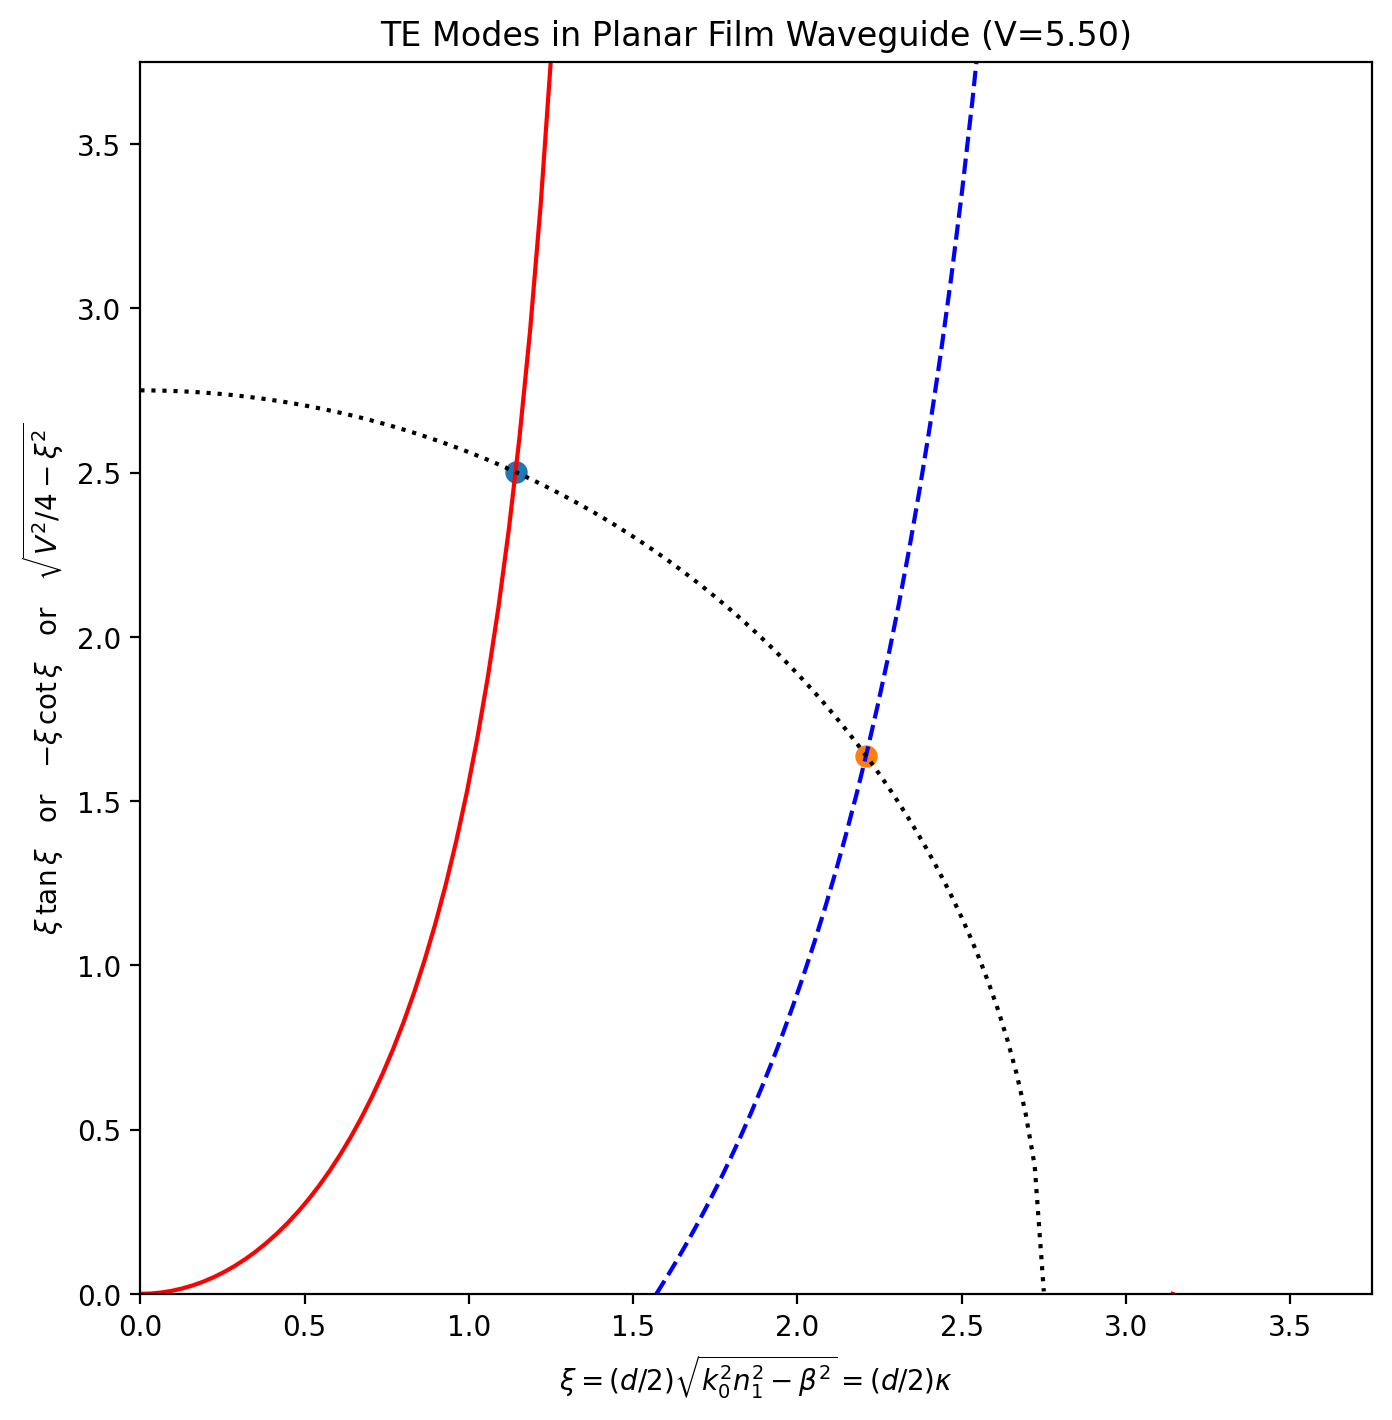

cutoff wavelength = 759 nm


In [4]:
V=5.5
xx = ofiber.TE_crossings(V)
aplt = ofiber.TE_mode_plot(V)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

print('cutoff wavelength = %.0f nm'%(2*d*NA*1e9))

### V=16

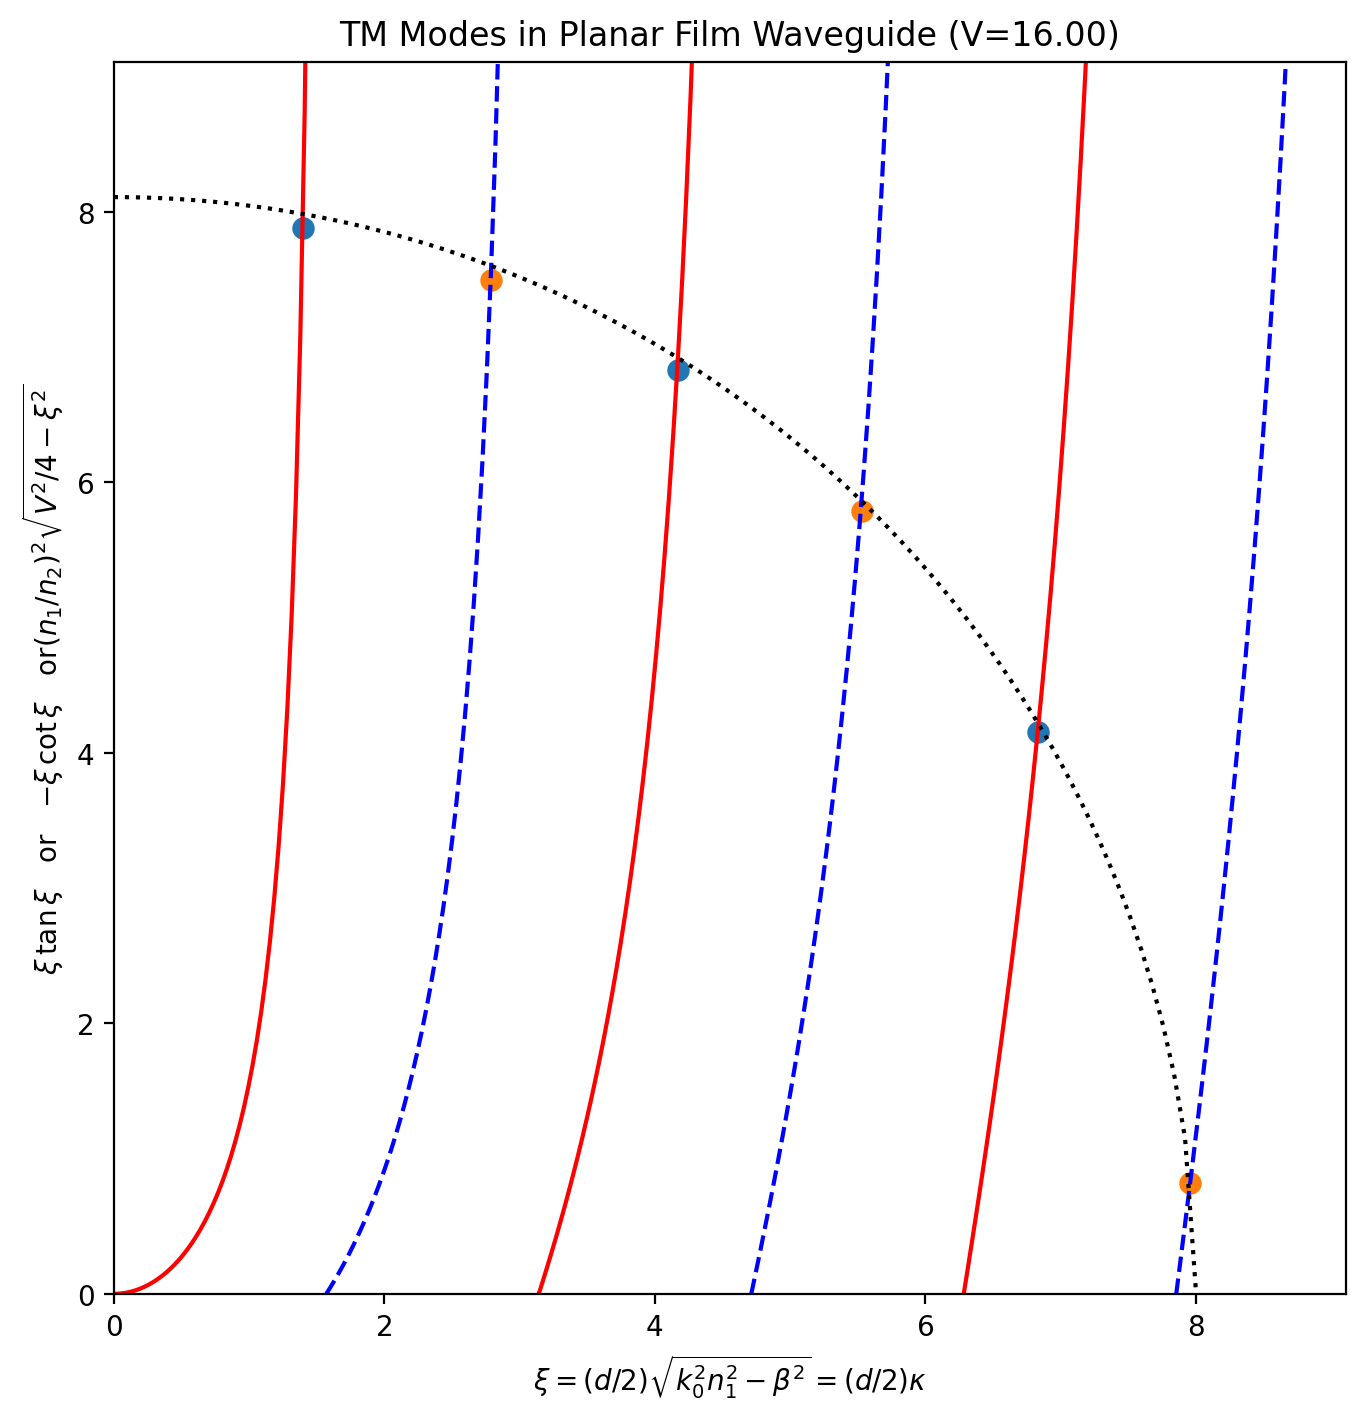

In [5]:
V=16
n1=1.5
n2=1.49
xx = ofiber.TM_crossings(V,n1,n2)

aplt = ofiber.TM_mode_plot(V,n1,n2)
yy = np.sqrt((V / 2)**2 - xx[0::2]**2)
aplt.scatter(xx[0::2],yy,s=50)
yy = np.sqrt((V / 2)**2 - xx[1::2]**2)
aplt.scatter(xx[1::2],yy,s=50)

aplt.show()

## Internal field inside waveguide

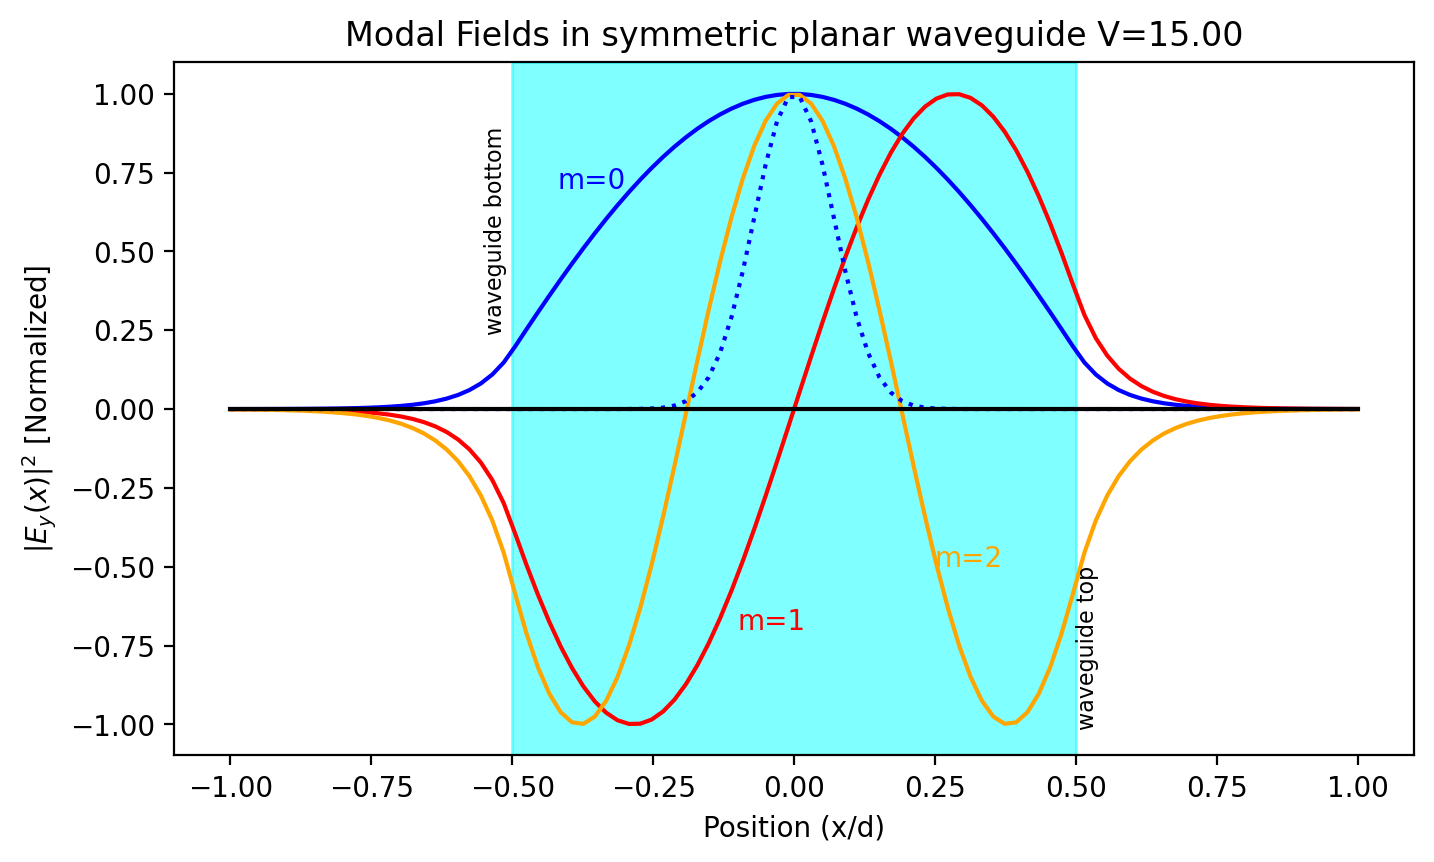

In [6]:
V= 15
d = 1
x = np.linspace(-1,1,100)

plt.figure(figsize=(8,4.5))
m=0
plt.plot(x,ofiber.TE_field(V,d,x,m), color='blue')
plt.text(-0.42, 0.7, 'm=%d'%m, color='blue')

m=1
plt.plot(x,ofiber.TE_field(V,d,x,m), color='red')
plt.text(-0.10, -0.7, 'm=%d'%m, color='red')

m=2
plt.plot(x,ofiber.TE_field(V,d,x,m), color='orange')
plt.text(0.25, -0.5, 'm=%d'%m, color='orange')

plt.plot(x,np.exp(-x**2/0.01),':b')
plt.plot([-1,1],[0,0],'k')

plt.axvspan(-0.5,0.5, color='cyan', alpha=0.5)
plt.text(-0.55, 0.25, 'waveguide bottom', rotation=90, fontsize=8)
plt.text(0.5, -1, 'waveguide top', rotation=90, fontsize=8)

plt.xlabel('Position (x/d)')
plt.ylabel('$|E_y(x)|^2$ [Normalized]')
plt.title('Modal Fields in symmetric planar waveguide V=%.2f'%V)
#plt.savefig('planarwaveguide.svg')
plt.show()

## TE propagation constants for first five modes

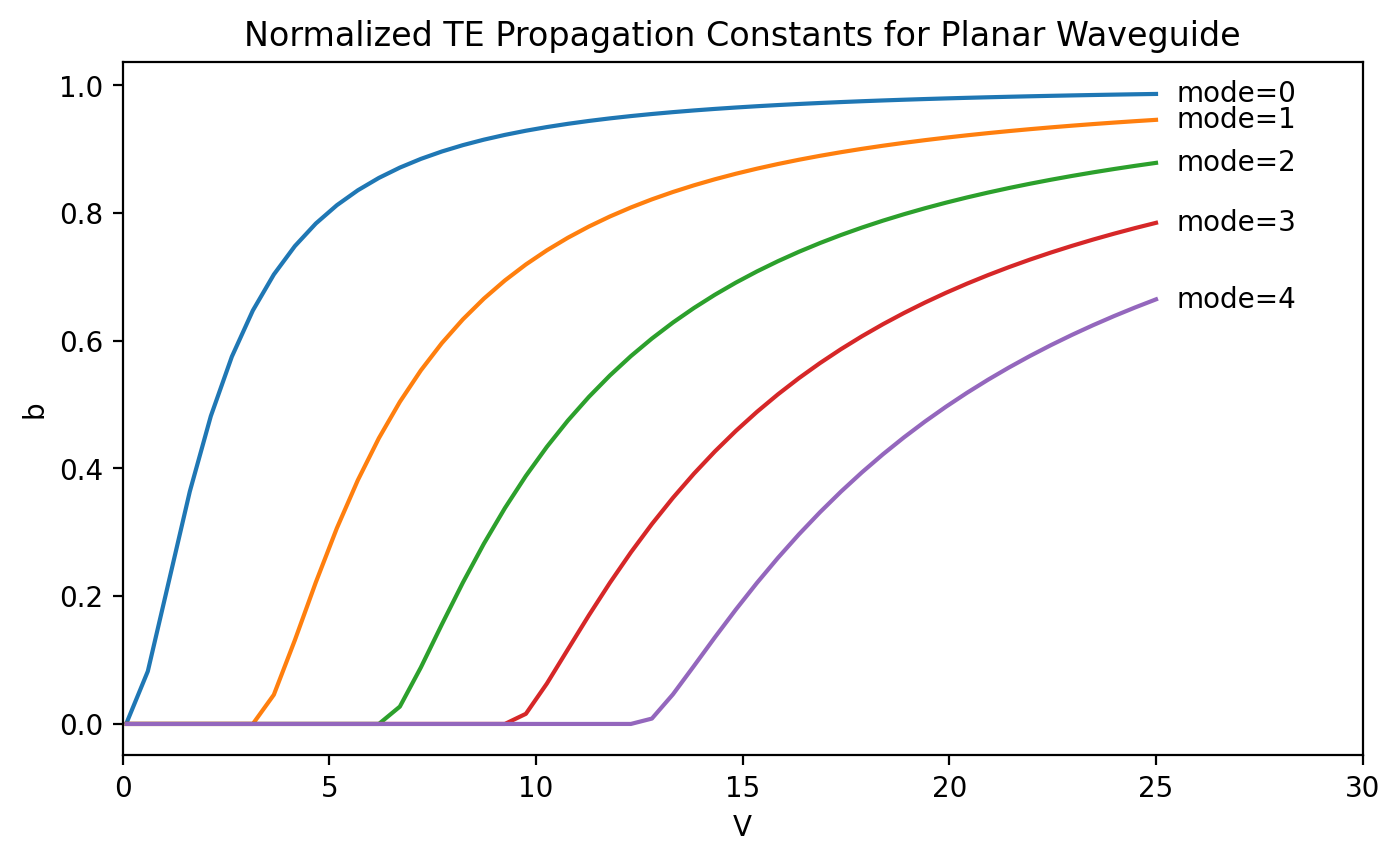

In [7]:
plt.figure(figsize=(8,4.5))

V = np.linspace(0.1,25,50)
for mode in range(5):
    b = ofiber.TE_propagation_constant(V,mode)
    plt.plot(V,b)
    plt.text(25.5,b[-1],"mode=%d"%mode,va='center')
    
plt.xlabel("V")
plt.ylabel('b')
plt.title('Normalized TE Propagation Constants for Planar Waveguide')
plt.xlim(0,30)
plt.show()

## TE & TM propagation constants for first five modes

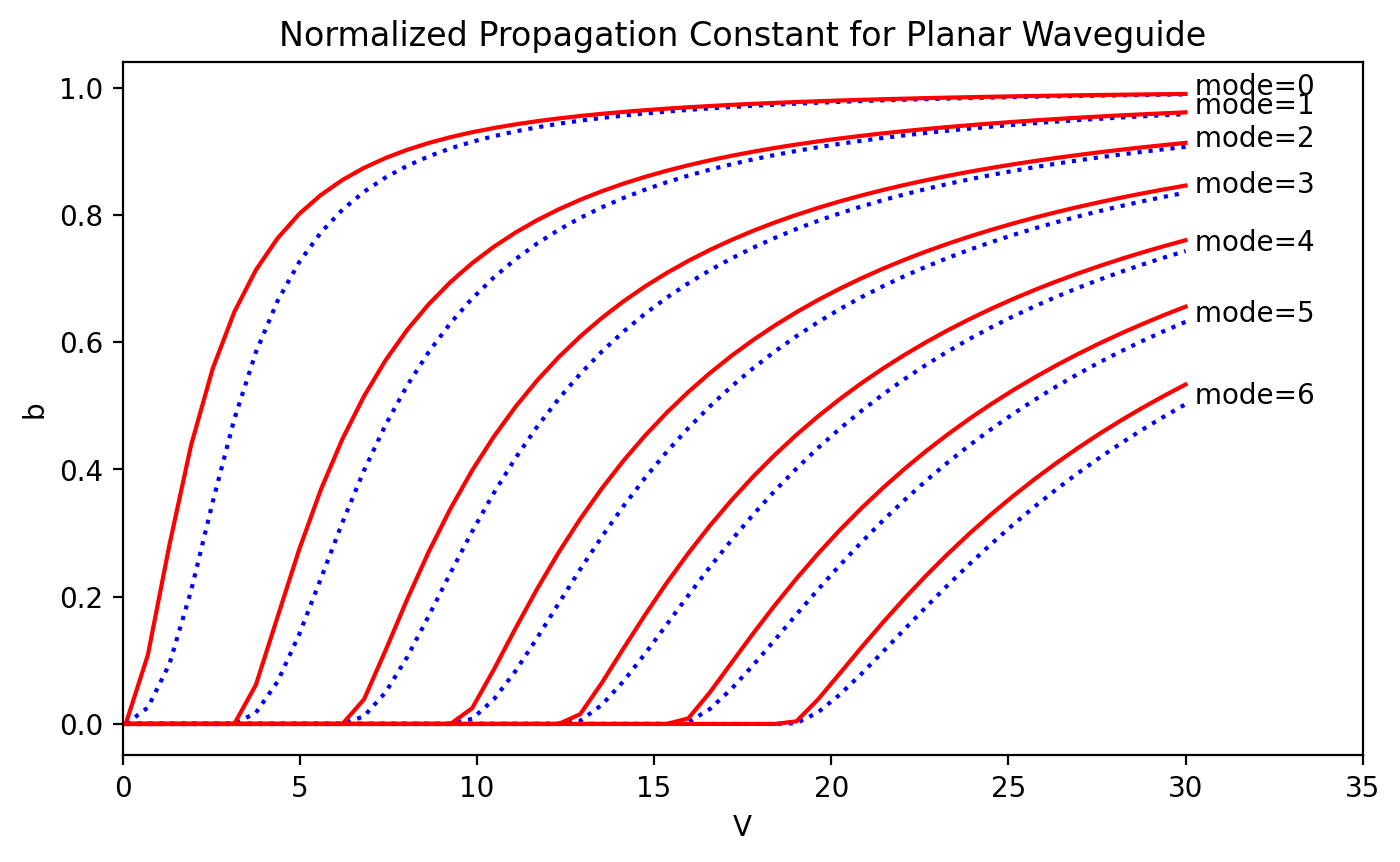

In [8]:
plt.figure(figsize=(8,4.5))
n1=1.5
n2=1.0
V = np.linspace(0.1,30,50)
for mode in range(7):
    b = ofiber.TM_propagation_constant(V,n1,n2,mode)
    plt.annotate(' mode=%d'%mode,xy=(30,b[-1]))
    plt.plot(V,b,':b')
    b = ofiber.TE_propagation_constant(V,mode)
    plt.plot(V,b,'r')
    
plt.xlabel("V")
plt.ylabel('b')
plt.title('Normalized Propagation Constant for Planar Waveguide')
plt.xlim(0,35)
plt.show()